 ## Import Necessary Libraries

In [432]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score





## Ignore Warnings

In [433]:
import warnings

warnings.filterwarnings("ignore")

## Read Data Set & Analyse Its Fields

In [434]:
# read the dataset

bike_sharing = pd.read_csv("day.csv")

## Sneak Peak At The Data

In [435]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [436]:
bike_sharing.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


## Describe Various Attributes

In [437]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Get The Shape

In [438]:
bike_sharing.shape

(730, 16)

## Data Quality Checks

In [439]:
bike_sharing.info()
# Do not see data missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### No Data To Clean Up No Null Values

## Clean up 5 columns since they are either not useful or redundant
    - 1. Instant is just a record number do not think this is needed for any analysis
    - 2. dteday do we really need a daily analysis ? Plus Month and Year should just be fine.
    - 3. Casual users is in cnt I think we can get rid of these columns
    - 4. Registered users count is in cnt
    - 5. Temp and atemp are similar can keep atemp and remove temp

In [440]:
bike_sharing = bike_sharing.drop(columns=['instant','dteday','casual','registered','temp'])


In [441]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [442]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Convert the Dtype for season and month first

In [443]:
bike_sharing[["season","mnth"]] = bike_sharing[["season","mnth"]].astype(object)
bike_sharing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 62.9+ KB


## Convert the weekday and weathersit

In [444]:
bike_sharing[["weekday","weathersit"]] = bike_sharing[["weekday","weathersit"]].astype(object)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [445]:
# Convert yr, holiday, workingday to object
# bike_sharing[["yr","workingday","holiday"]] = bike_sharing[["yr","workingday","holiday"]].astype(object)
# bike_sharing.info()

## Replace the Season & Mnth

In [446]:
bike_sharing["season"] = bike_sharing["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})
bike_sharing["mnth"] = bike_sharing["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})


## Replace the Weekday and Weathersit

In [447]:
bike_sharing["weekday"] = bike_sharing["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bike_sharing["weathersit"] = bike_sharing["weathersit"].replace({1:"Clear + Partly Cloudy",2:"Mist + Cloudy",3:"Light Precipitation",4:"Heavy Precipitation"})


In [448]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,1600


## Get stats of numeric variables

In [449]:
bike_sharing[['atemp','hum','windspeed','cnt']].describe()


,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849
std,8.150308,14.237589,5.195841,1936.011647
min,3.953480,0.000000,1.500244,22.000000
25%,16.889713,52.000000,9.041650,3169.750000
50%,24.368225,62.625000,12.125325,4548.500000
75%,30.445775,72.989575,15.625589,5966.000000
max,42.044800,97.250000,34.000021,8714.000000


In [450]:
## Scatter Plot of Continuous Variables vs 'cnt'

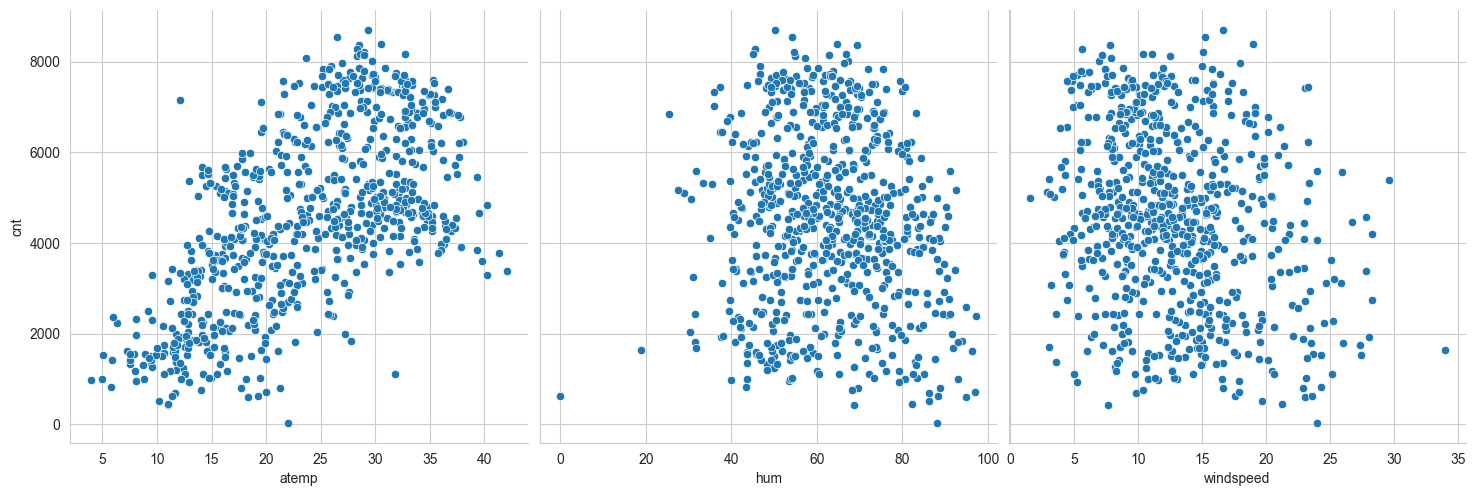

In [451]:

sns.set_style("whitegrid")
sns.pairplot(data=bike_sharing,x_vars=['atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);


## Inference from the above charts
    - We see linearity between cnt and atemp and cnt vs hum and cnt vs windspeed
    - This makes a case for liner regression model


## Get a Pairplot For All Data

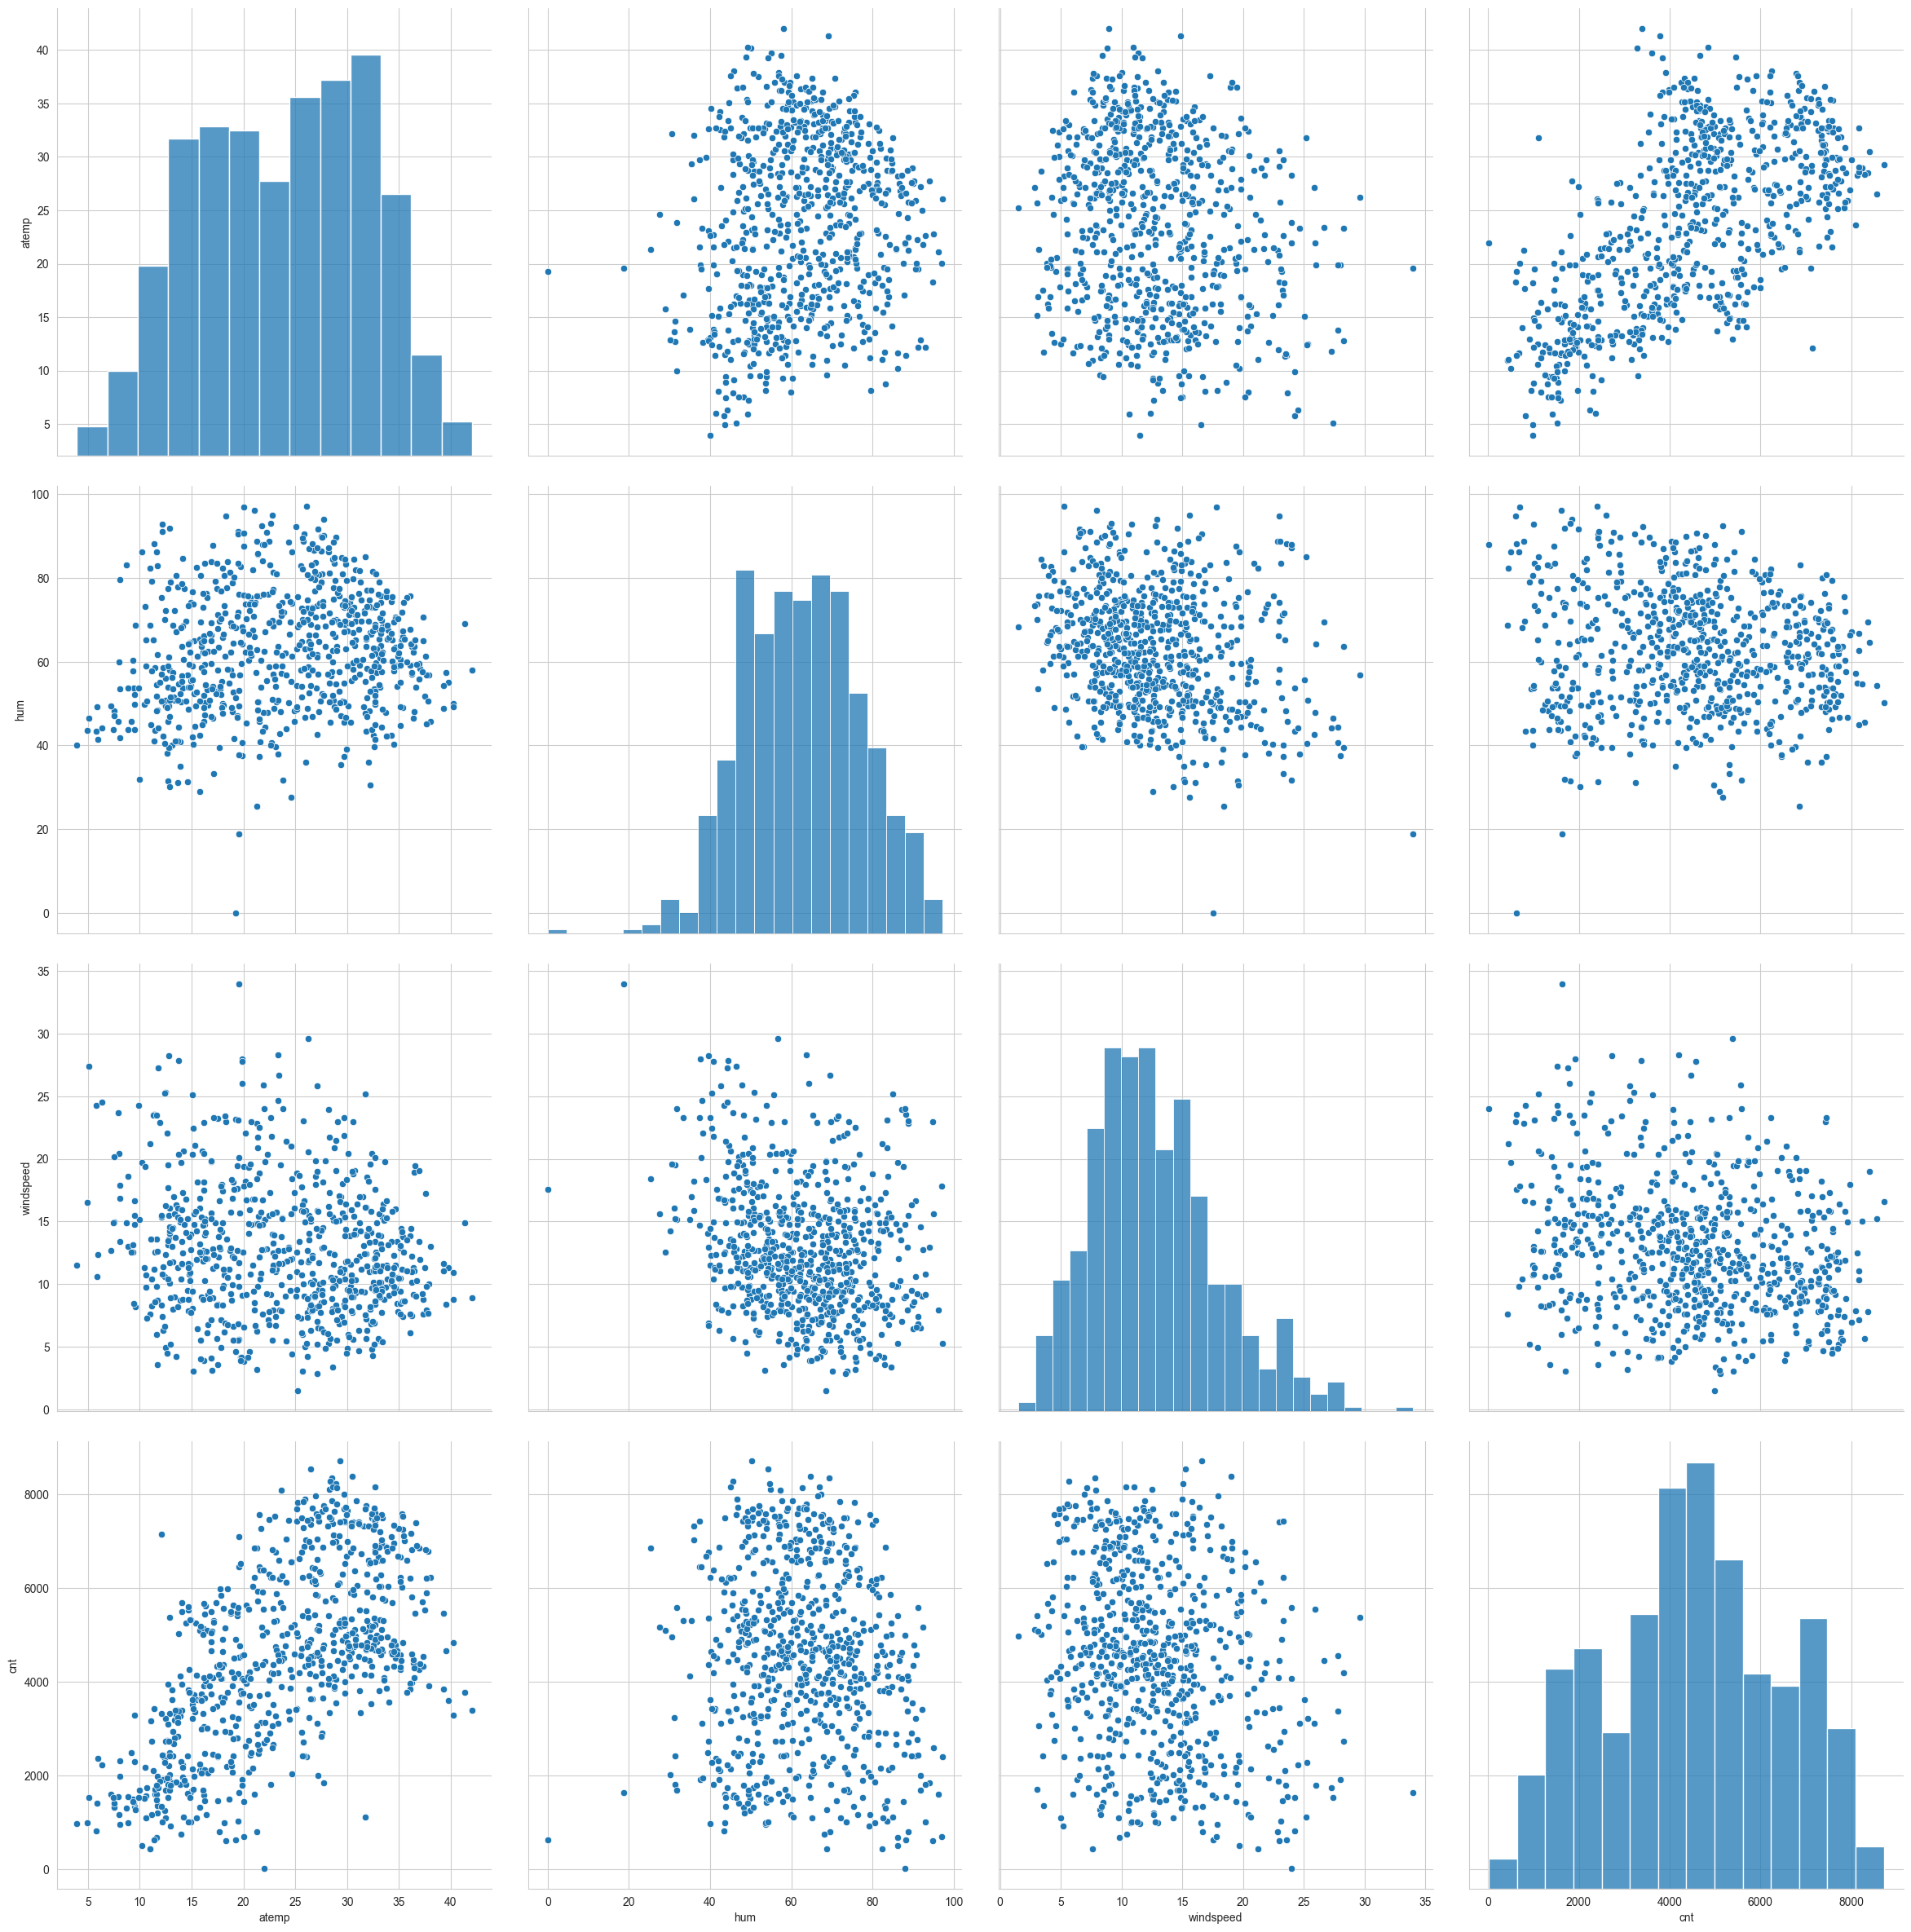

In [452]:
# Needed since the actual size is very small
g = sns.pairplot(bike_sharing[['atemp','hum','windspeed',"cnt"]])
g.fig.set_size_inches(25,25)
plt.show()

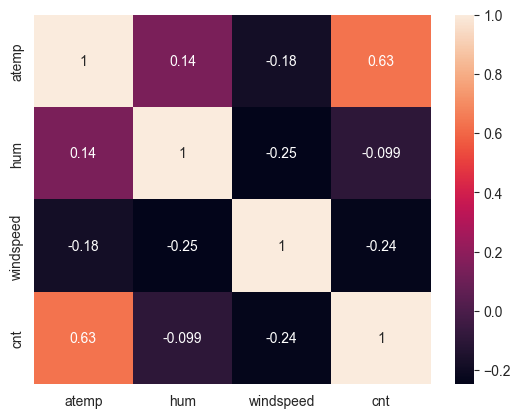

In [453]:
# Check correlations between numerical variables
sns.heatmap(bike_sharing[['atemp','hum','windspeed',"cnt"]].corr(),annot=True)
plt.show()


## Visualizing Categorial Variables

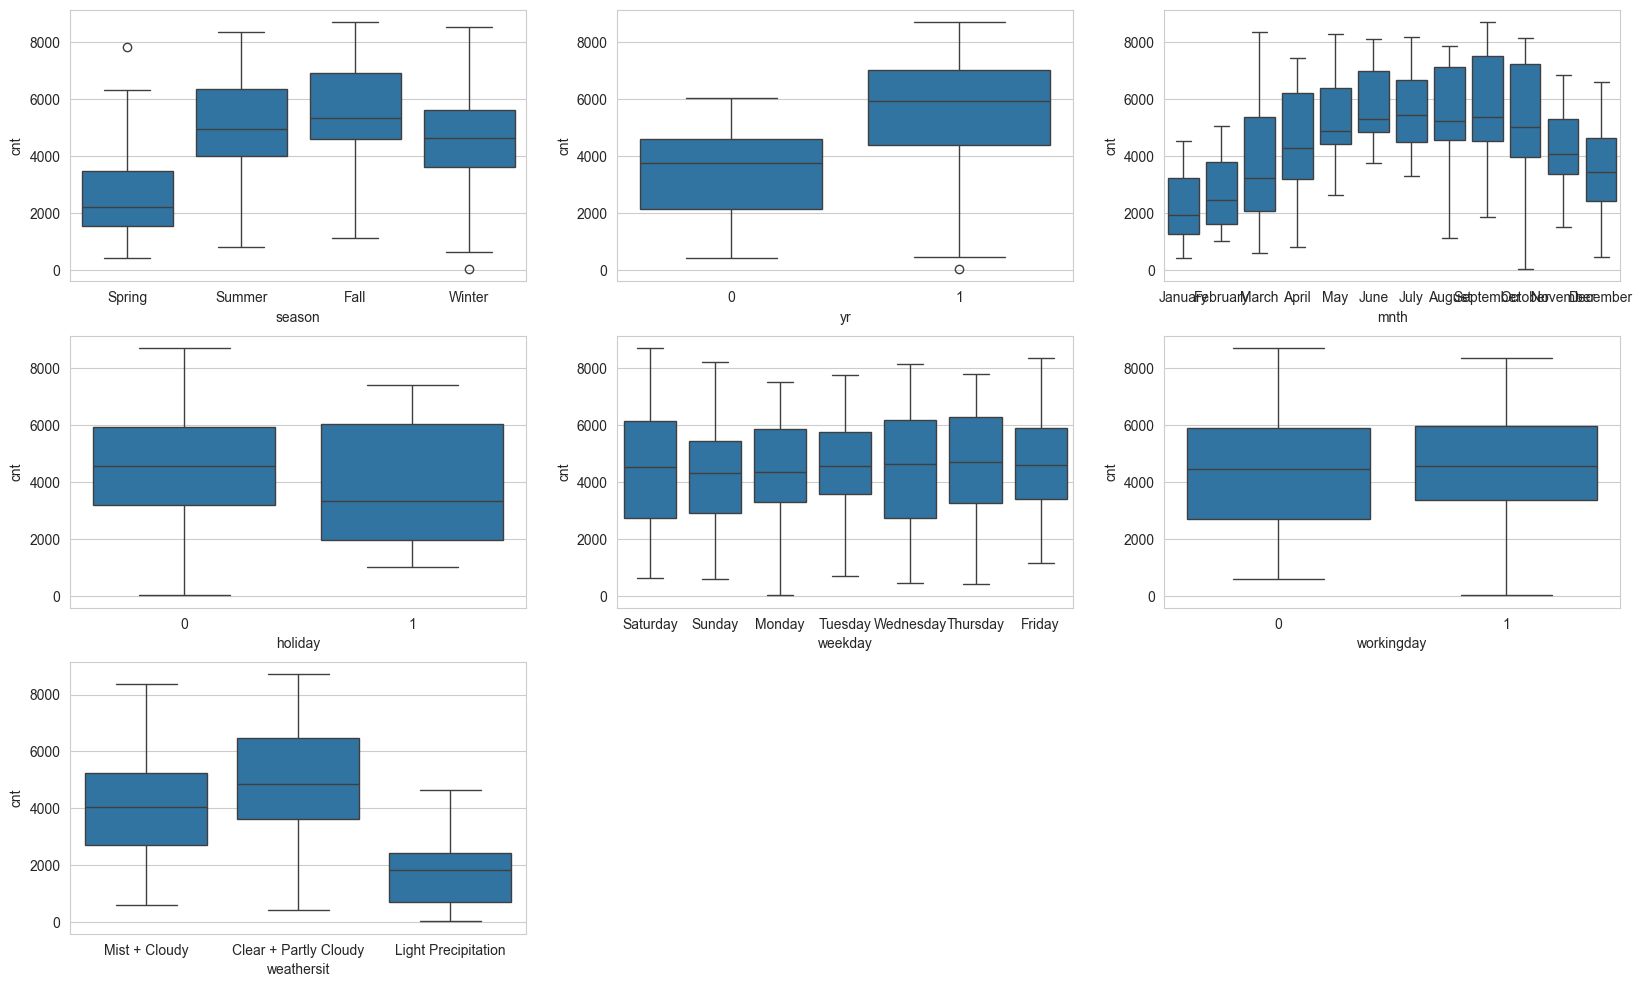

In [454]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()


## Inferences
    - Most bikes were rented in fall season and in year 2019
    - April to October was the time most bikes were rented
    - Light Percipitation caused drop in the bikes being taken for a spin.
    - Be it weekdays or weekends the bikes are being rented without much variance in the count
    

## The dype is needed below since its converting the columns to true/false instead of 1 or 0

In [455]:
bike_sharing = pd.get_dummies(bike_sharing,columns=["season","mnth","weekday","weathersit"],drop_first=True, dtype=int)
bike_sharing = bike_sharing.apply(pd.to_numeric)
bike_sharing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   atemp                           730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_Spring                   730 non-null    int64  
 8   season_Summer                   730 non-null    int64  
 9   season_Winter                   730 non-null    int64  
 10  mnth_August                     730 non-null    int64  
 11  mnth_December                   730 non-null    int64  
 12  mnth_February                   730 

In [456]:
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Precipitation',
       'weathersit_Mist + Cloudy'],
      dtype='object')

## Test Train Split The Data To Start Building The Model

In [457]:
df_bike_train, df_bike_test = train_test_split(bike_sharing, train_size=0.7, random_state=100)
print(df_bike_train.shape)
print(df_bike_test.shape)

(510, 29)
(220, 29)


## Rescaling
 
 - Is needed as all coefficients need to have the same unit.
 - For example humidity and temperature are measured in different units
 - Unless one rescales them between 0 and 1 one would have more weightage than the other
 - Normalization (x - xmin)/(xmax - xmin)
 - Standardization: (x - mu)/sigma

In [458]:
scaler = MinMaxScaler()

In [459]:
# Create a list of numeric variables

num_vars = ["atemp","hum","windspeed","cnt"]

# 2. Fit on data

# fit(): learns xmin, xmax
# transform(): x-xmin/xmax-xmin

# fit_transform()

df_bike_train[num_vars] = scaler.fit_transform(df_bike_train[num_vars])

df_bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Step-3: Training the Model


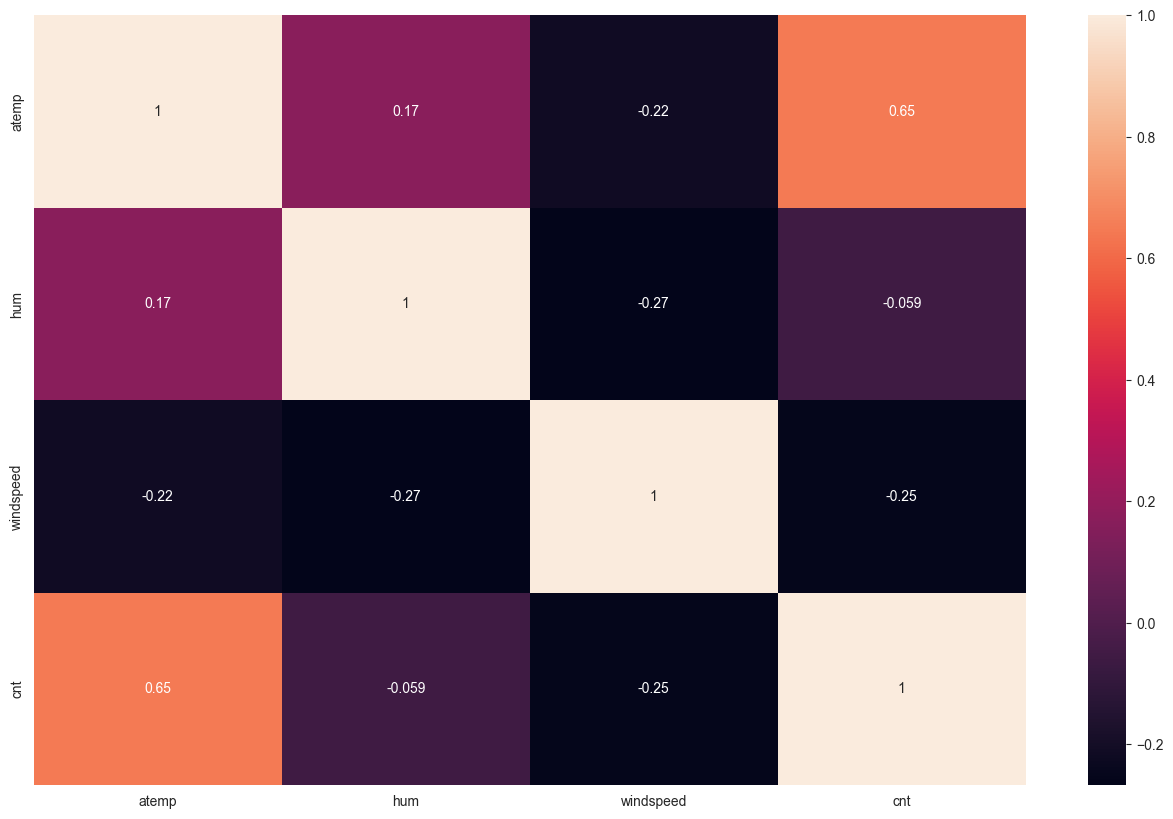

In [460]:
# heatmap //UNable to get much from this one but one thing is sure the dependency is on cnt

plt.figure(figsize = (16,10))
sns.heatmap(df_bike_train[num_vars].corr(), annot = True)
plt.show()

In [461]:
# Dividing df_train into X and y for model building

y_bike_train = df_bike_train.pop('cnt')
X_bike_train = df_bike_train


## Model Building

In [462]:
lm = LinearRegression()

lm.fit(X_bike_train,y_bike_train)
rfe = RFE(lm,step = 15)
rfe = rfe.fit(X_bike_train, y_bike_train)

# Checking the columns which were deemed suitable by RFE for model building
col = X_bike_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'mnth_August', 'mnth_July', 'mnth_November',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weathersit_Light Precipitation'],
      dtype='object')

In [463]:
X_bike_train_rfe = X_bike_train[col]
X_bike_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,mnth_August,mnth_July,mnth_November,weekday_Saturday,weekday_Sunday,weekday_Thursday,weathersit_Light Precipitation
576,1,0,1,0.766351,0.725633,0.264686,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,1,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0,0,0,0,0,0,0,0


In [464]:
# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm.astype(float)).fit()

# Checking statistical summary of the model

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     176.5
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.69e-176
Time:                        11:27:24   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -930.8
Df Residuals:                     496   BIC:                            -871.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [465]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,36.30
10,weekday_Saturday,8.75
11,weekday_Sunday,8.42
3,atemp,2.63
1,holiday,2.37
6,season_Spring,1.93
8,mnth_July,1.37
7,mnth_August,1.27
4,hum,1.24
9,mnth_November,1.23


In [466]:
# Dropping mnth_November since it is insignificant in presence of other variables as seen with the high p-value

X_bike_train_rfe = X_bike_train_rfe.drop(["mnth_November"], axis = 1)

# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm).fit()

# Checking statistical summary of the model

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.6
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          1.20e-177
Time:                        11:27:25   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -932.8
Df Residuals:                     497   BIC:                            -877.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [467]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,33.98
9,weekday_Saturday,8.23
10,weekday_Sunday,7.89
3,atemp,2.35
1,holiday,2.19
6,season_Spring,1.66
8,mnth_July,1.36
7,mnth_August,1.27
4,hum,1.24
5,windspeed,1.15


In [468]:
# Dropping mnth_November since it is insignificant in presence of other variables as seen with the high p-value

X_bike_train_rfe = X_bike_train_rfe.drop(["weekday_Thursday"], axis = 1)

# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          8.13e-179
Time:                        11:27:27   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     498   BIC:                            -883.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [469]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,33.47
9,weekday_Saturday,8.22
10,weekday_Sunday,7.88
3,atemp,2.35
1,holiday,2.17
6,season_Spring,1.66
8,mnth_July,1.36
7,mnth_August,1.27
4,hum,1.24
5,windspeed,1.15


In [470]:
# Dropping mnth_November since it is insignificant in presence of other variables as seen with the high p-value

X_bike_train_rfe = X_bike_train_rfe.drop(["workingday"], axis = 1)

# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          8.13e-179
Time:                        11:27:28   Log-Likelihood:                 479.38
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     498   BIC:                            -883.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [471]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,12.59
3,hum,11.60
4,windspeed,3.95
0,yr,2.03
5,season_Spring,1.81
7,mnth_July,1.47
6,mnth_August,1.39
8,weekday_Saturday,1.22
9,weekday_Sunday,1.21
10,weathersit_Light Precipitation,1.12


In [472]:
# Dropping mnth_November since it is insignificant in presence of other variables as seen with the high p-value

X_bike_train_rfe = X_bike_train_rfe.drop(["weekday_Sunday"], axis = 1)

# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.8
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          4.48e-178
Time:                        11:27:29   Log-Likelihood:                 474.81
No. Observations:                 510   AIC:                            -927.6
Df Residuals:                     499   BIC:                            -881.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [473]:
## STOP HERE ## 

## VIF

In [474]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)

In [475]:
vif

,Features,VIF
2,atemp,12.59
3,hum,11.44
4,windspeed,3.94
0,yr,2.03
5,season_Spring,1.81
7,mnth_July,1.47
6,mnth_August,1.39
8,weekday_Saturday,1.19
9,weathersit_Light Precipitation,1.11
1,holiday,1.04


In [476]:
# Dropping hum since it is insignificant in presence of other variables as seen with the high p-value

X_bike_train_rfe = X_bike_train_rfe.drop(["weekday_Saturday"], axis = 1)

# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.0
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          8.65e-179
Time:                        11:27:33   Log-Likelihood:                 473.63
No. Observations:                 510   AIC:                            -927.3
Df Residuals:                     500   BIC:                            -884.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [477]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)

In [478]:
vif

,Features,VIF
2,atemp,12.59
3,hum,11.40
4,windspeed,3.90
0,yr,2.03
5,season_Spring,1.80
7,mnth_July,1.47
6,mnth_August,1.39
8,weathersit_Light Precipitation,1.11
1,holiday,1.03


In [479]:
# Dropping atemp since it is insignificant in presence of other variables as seen with the high p-value

X_bike_train_rfe = X_bike_train_rfe.drop(["hum"], axis = 1)

# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     245.4
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          6.70e-168
Time:                        11:27:36   Log-Likelihood:                 445.12
No. Observations:                 510   AIC:                            -872.2
Df Residuals:                     501   BIC:                            -834.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [480]:
#**********************WAIT TILL HERE****************

In [481]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,4.65
3,windspeed,3.76
0,yr,2.03
4,season_Spring,1.49
5,mnth_August,1.34
6,mnth_July,1.33
7,weathersit_Light Precipitation,1.05
1,holiday,1.03


In [482]:
# Dropping atemp since it is insignificant in presence of other variables as seen with the high p-value

X_bike_train_rfe = X_bike_train_rfe.drop(["mnth_August"], axis = 1)

# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.1
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          3.16e-168
Time:                        11:27:41   Log-Likelihood:                 442.98
No. Observations:                 510   AIC:                            -870.0
Df Residuals:                     502   BIC:                            -836.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [483]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,atemp,3.87
3,windspeed,3.66
0,yr,2.03
4,season_Spring,1.49
5,mnth_July,1.25
6,weathersit_Light Precipitation,1.05
1,holiday,1.03


In [484]:
# Dropping atemp since it is insignificant in presence of other variables as seen with the high p-value

X_bike_train_rfe = X_bike_train_rfe.drop(["holiday"], axis = 1)

# Adding constant variable

X_bike_train_rfe_sm = sm.add_constant(X_bike_train_rfe)

# Running the linear model

lm = sm.OLS(y_bike_train,X_bike_train_rfe_sm).fit()

# Checking statistical summary of the model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     320.1
Date:                Sat, 22 Jun 2024   Prob (F-statistic):          3.68e-168
Time:                        11:29:45   Log-Likelihood:                 439.85
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     503   BIC:                            -836.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [485]:
## Calculate The VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif["Features"] = X_bike_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_bike_train_rfe.values, i) for i in range(X_bike_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,atemp,3.86
2,windspeed,3.66
0,yr,2.03
3,season_Spring,1.49
4,mnth_July,1.25
5,weathersit_Light Precipitation,1.04


## The model looks ok now. 
    - Now since all variables are significant and VIF values are less than 5, 
      we can consider this to be the final model with 09 parameters.
    - R-squared is 79.2% and Adjusted R-squared is 79.0% which is very good to accept the model.
    - Also, Prob (F-statistic) ~ 0 which indicates that the model is significant.

## Validating Assumptions of Linear Regression


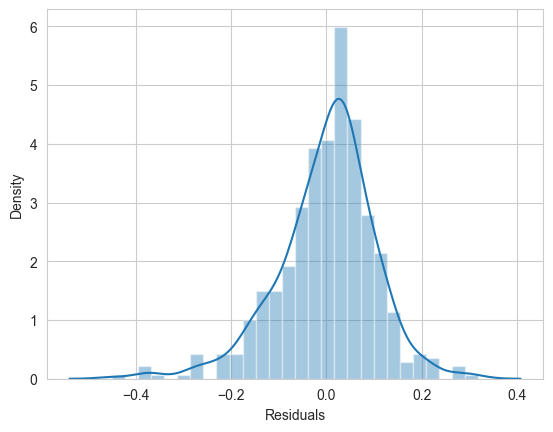

In [486]:
# Creating y_train_pred

y_bike_train_pred = lm.predict(X_bike_train_rfe_sm)

# Finding residuals

res = y_bike_train - y_bike_train_pred

# Visualizing distribution of residuals

sns.distplot(res)
plt.xlabel("Residuals")
plt.show()


## Residuals are approximately normally distributed with mean centered at 0 and hence the model is valid


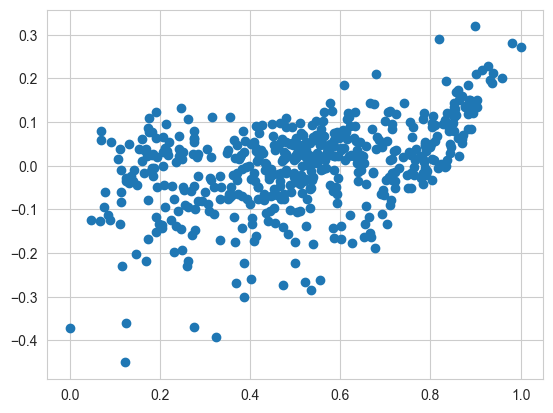

In [487]:
# Checking if error terms are independent of each other

plt.scatter(y_bike_train,res)
plt.show()


In [488]:
X_bike_train_rfe

,yr,atemp,windspeed,season_Spring,mnth_July,weathersit_Light Precipitation
576,1,0.766351,0.264686,0,1,0
426,1,0.438975,0.255342,1,0,0
728,1,0.200348,0.663106,1,0,0
482,1,0.391735,0.188475,0,0,0
111,0,0.318819,0.380981,0,0,0
...,...,...,...,...,...,...
578,1,0.824359,0.187140,0,0,0
53,0,0.218747,0.111379,1,0,0
350,0,0.223544,0.431816,0,0,0
79,0,0.434043,0.529881,0,0,0


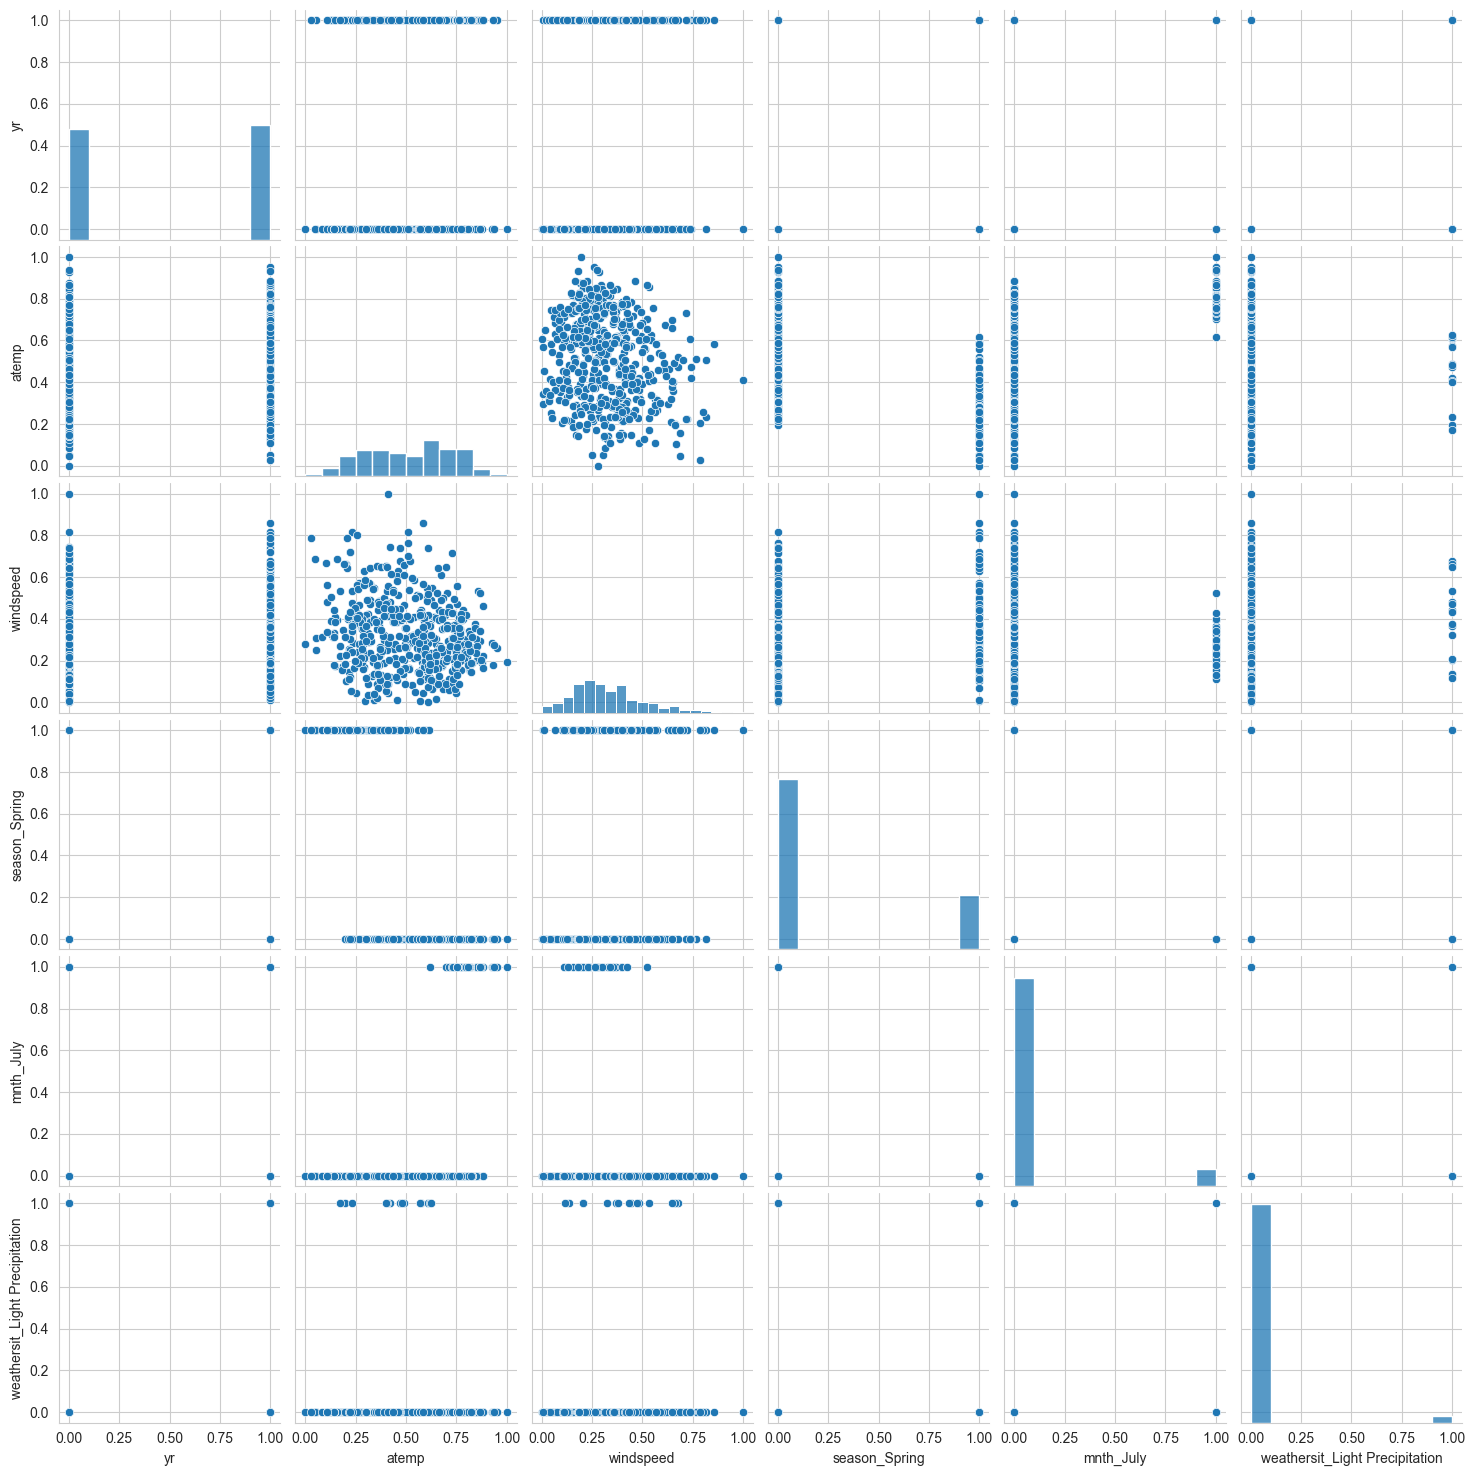

In [489]:
# Checking if there is linearity between any variable and cnt to verify if a linear regression model can be used

sns.pairplot(X_bike_train_rfe)
plt.show()


#### There is no clear relationship between any of the variable in the final model, so there is no multicolinearity that exists


### Making Predictions Using the Final Model


In [490]:
# Rescaling atemp, hum, windspeed and cnt in df_bike_test

df_bike_test[['atemp','hum','windspeed','cnt']] = scaler.transform(df_bike_test[['atemp','hum','windspeed','cnt']])
df_bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [496]:
# Dividing into X and y

y_bike_test = df_bike_test.pop('cnt')
X_bike_test = df_bike_test


KeyError: 'cnt'

In [497]:
y_bike_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [498]:
X_bike_test

,yr,holiday,workingday,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.511907,0.756118,0.283397,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.577380,0.650923,0.069510,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.682653,0.817947,0.052115,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
72,0,0,1,0.332005,0.512107,0.203418,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [505]:
# Creating X_test_new after droppping variables which are not there in the final model

X_bike_test_new = X_bike_test[X_bike_train_rfe.columns]

# Adding a constant variable

X_bike_test_new = sm.add_constant(X_bike_test_new)

# Making predictions using final model

y_bike_test_pred = lm.predict(X_bike_test_new)

y_bike_test_pred

184    0.521053
535    0.848833
299    0.430309
221    0.565741
152    0.514305
         ...   
702    0.680701
127    0.503294
640    0.789875
72     0.232748
653    0.673431
Length: 220, dtype: float64

,const,yr,atemp,windspeed,season_Spring,mnth_July,weathersit_Light Precipitation
184,1.0,0,0.769660,0.084219,0,1,0
535,1.0,1,0.842587,0.153728,0,0,0
299,1.0,0,0.496145,0.334206,0,0,0
221,1.0,0,0.795343,0.339570,0,0,0
152,1.0,0,0.741471,0.537414,0,0,0
...,...,...,...,...,...,...,...
702,1.0,1,0.511907,0.283397,0,0,0
127,1.0,0,0.577380,0.069510,0,0,0
640,1.0,1,0.682653,0.052115,0,0,0
72,1.0,0,0.332005,0.203418,1,0,0


#### Model Evaluation


Text(0, 0.5, 'y_bike_test_pred')

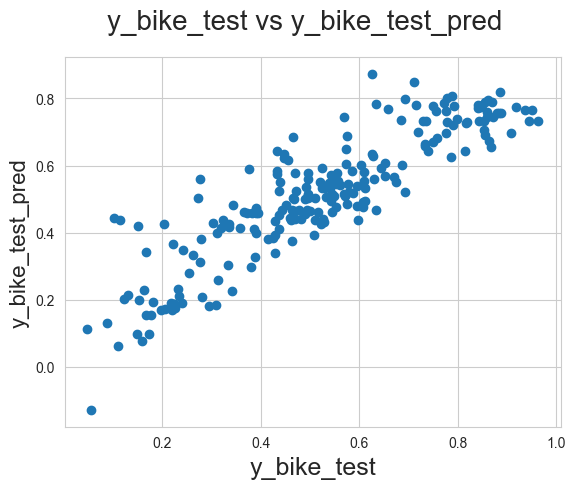

In [501]:
# Visualizing y_test vs y_test_pred

fig = plt.figure()
plt.scatter(y_bike_test,y_bike_test_pred)
fig.suptitle('y_bike_test vs y_bike_test_pred', fontsize=20) 
plt.xlabel('y_bike_test', fontsize=18)
plt.ylabel('y_bike_test_pred', fontsize=16)


In [502]:
# R-squared value for the final model on test set

r2 = r2_score(y_bike_test, y_bike_test_pred)
print(r2)

0.7805057649055894


In [503]:
# Adjusted R-squared value for the final model on test set

Adj_r2 = 1-(1-r2)*((df_bike_test.shape[0]-1)/(df_bike_test.shape[0]-10-1))
print(Adj_r2)


0.7700036483938951


In [ ]:
- R-squared is 79.2% and Adjusted R-squared is 79.0% which is very good to accept the model.
- R-squared is 78.05% on train set and 77.1% on test set

- These values are acceptable so the model is valid with 6 parameters namely:

- yr
- atemp
- windspeed
- season_Spring
- mnth_July
- weathersit_Light Precipitation
- Let Xi denote the variables where i is the variable number in the above list, 
- for example X1 denotes yr, X2 denotes atemp, etc.

- We can see that the equation of our best fitted line based on the final model is:

- cnt = 0.236 * X1 + 0.4551 * X2 - 0.1361 * X3 - 0.1407 * X4 - 0.0677 * X5 - 0.2377 * X6 

X1 = yr                                 0.2363      
X2 = atemp                              0.4551      
X3 = windspeed                         -0.1361      
X4 = season_Spring                     -0.1407      
X5 = mnth_July                         -0.0677      
X6 = weathersit_Light Precipitation    -0.2377      

